In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
#get overview of data
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  10000
nNumber of features: 14
nData Features:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
nMissing values: 0
nUnique values:
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## **Dropping Irrelevant Features**

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Encoding Categorical Data**

In [10]:
df = pd.get_dummies(df,drop_first = True) #one hot encoding

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## **Target Variable Exploration**

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
target_instance = df["Exited"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Exited', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()


#or sns.countplot(df['Exited'])

## **Exploring categorical features**

In [ ]:
#Defining bar chart function
def bar(feature, df=df ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Exited']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Exited', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.show()

In [11]:
X = df.drop('Exited',axis=1)
y = df['Exited']

 **Plotting demographic features**

In [ ]:
#Gender feature plot
bar('Gender_Male')
bar('Tenure')
bar('NumOfProducts')
bar('HasCrCard')
bar('IsActiveMember')
bar('Geography_Germany')
bar('Geography_Spain')


In [ ]:
target_instance = df["Gender_Male"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Gender_Male', names='Category', color_discrete_sequence=["green", "red"],
             title='Churn rate by Gender')
fig.show()

In [ ]:
target_instance = df["Tenure"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Tenure', names='Category',
             title='Churn rate by Tenure')
fig.show()

In [ ]:
target_instance = df["NumOfProducts"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='NumOfProducts', names='Category',
             title='Churn rate by Number Of Products')
fig.show()

In [ ]:
target_instance = df["IsActiveMember"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='IsActiveMember', names='Category', color_discrete_sequence=["green", "red"],
             title='Churn rate by Is an Active Member')
fig.show()

In [ ]:
target_instance = df["HasCrCard"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='HasCrCard', names='Category', color_discrete_sequence=["green", "red"],
             title='Churn rate by Has A Credit Card ')
fig.show()

In [ ]:
target_instance = df["Geography_Germany"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Geography_Germany', names='Category', color_discrete_sequence=["green", "red"],
             title='Churn rate by Geography - Germany')
fig.show()

In [ ]:
target_instance = df["Geography_Spain"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Geography_Spain', names='Category', color_discrete_sequence=["green", "red"],
             title='Churn rate by Geography - Spain')
fig.show()

## **Exploring numeric features**

In [ ]:
# Defining the histogram plotting function
def hist(feature):
    group_df = df.groupby([feature, 'Exited']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Exited', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["blue", "pink"])
    fig.show()

In [ ]:
hist('Age')
hist('Tenure')
hist('NumOfProducts')
hist('CreditScore')
hist('EstimatedSalary')
hist('Balance')

In [ ]:
#Create an empty dataframe
bin_df = pd.DataFrame()

#Update the binning dataframe
bin_df['Age_bins'] =  pd.qcut(df['Age'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Tenure_bins'] =  pd.qcut(df['Tenure'], q=3, labels= ['low', 'medium', 'high'])
bin_df['CreditScore_bins'] =  pd.qcut(df['CreditScore'], q=3, labels= ['low', 'medium', 'high'])
bin_df['EstimatedSalary_bins'] =  pd.qcut(df['EstimatedSalary'], q=3, labels= ['low', 'medium', 'high'])

#bin_df['NumOfProducts_bins'] =  pd.qcut(df['NumOfProducts'], q=3, labels= ['low', 'medium', 'high'])
#bin_df['Balance_bins'] =  pd.qcut(df['Balance'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Exited'] = df['Exited']

#Plot the bar chart of the binned variables
bar('Age_bins', bin_df)
bar('Tenure_bins', bin_df)
bar('CreditScore_bins', bin_df)
bar('EstimatedSalary_bins', bin_df)

#bar('NumOfProducts_bins', bin_df)
#bar('Balance_bins', bin_df)


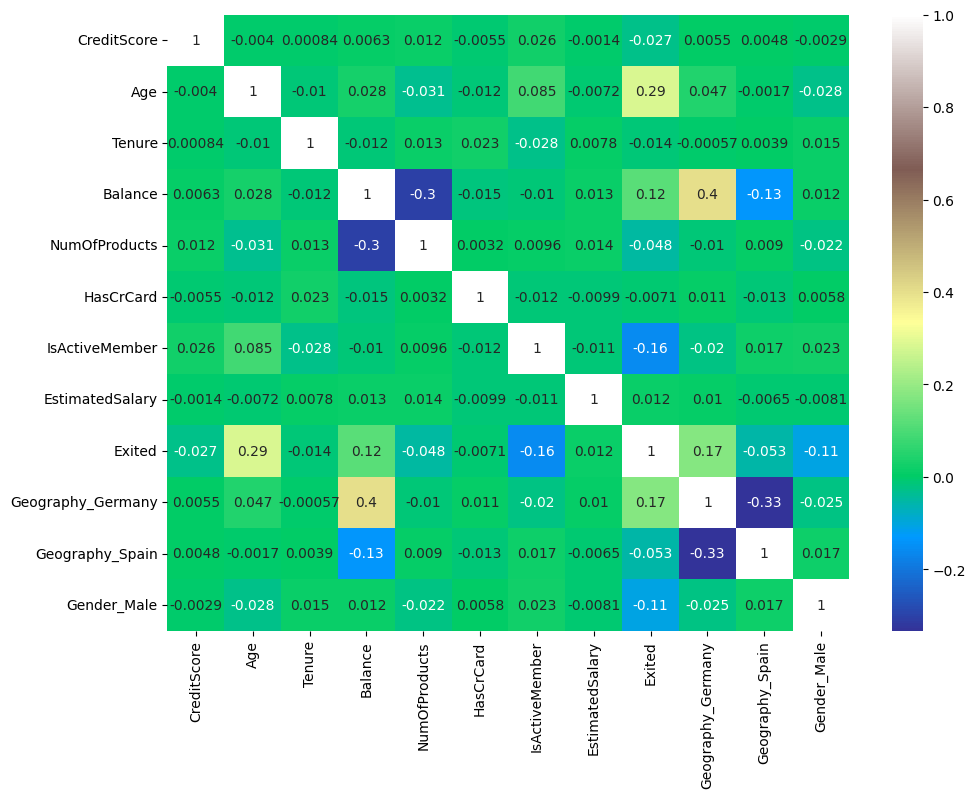

In [ ]:
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), annot = True, cmap = 'terrain')
plt.show()

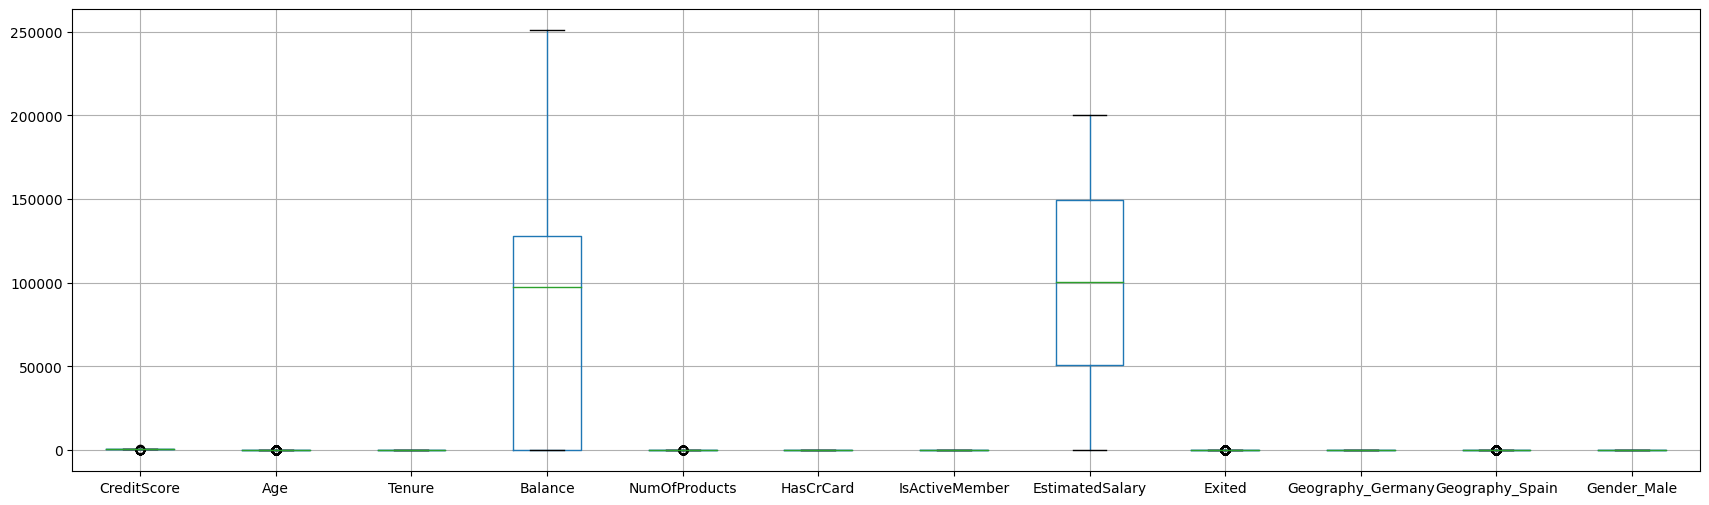

In [ ]:
df.boxplot(figsize = (21,6))
plt.show()

## **Splitting dataset**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


##**Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.47944328,  0.19687202, -0.00234647, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 1.04580863,  1.33803657,  1.03625698, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [-0.85297437, -0.08841912,  1.03625698, ..., -0.5761528 ,
         1.73307782,  0.91105005],
       ...,
       [ 0.86941896, -0.08841912, -1.38715108, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [ 0.16386025,  0.38706611,  1.03625698, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 0.47513615,  1.14784248, -1.38715108, ...,  1.73565068,
        -0.57700814,  0.91105005]])

##**Random Forest**

In [ ]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
class_report1 = classification_report(y_test, y_pred1)
a1= f"Accuracy: {accuracy:.4f}"
print(a1)
print("\nConfusion Matrix:\n", conf_matrix1)
print("\nClassification Report:\n", class_report1)

Accuracy: 0.8665

Confusion Matrix:
 [[1548   59]
 [ 208  185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



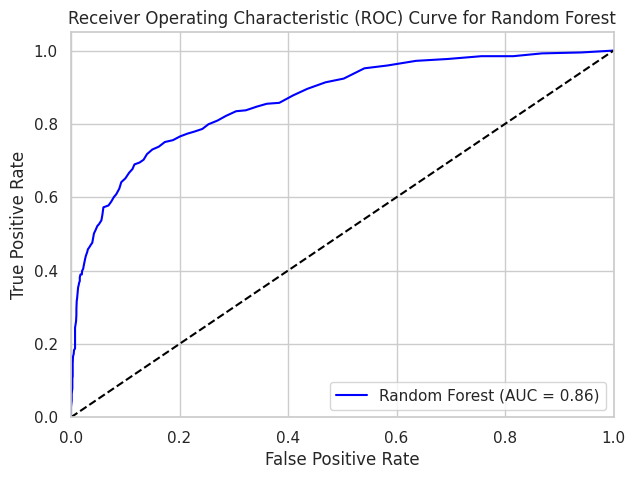

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities
y_pred_proba1 = rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba1)

# Plot the ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})',color="blue")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


##**XGBoost**

In [15]:
import xgboost as xgb

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,       # Maximum tree depth
    learning_rate=0.1, # Step size shrinkage used in updates to prevent overfitting
    random_state=47    # Random seed for reproducibility
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
class_report2 = classification_report(y_test, y_pred2)

a2= f"Accuracy: {accuracy:.4f}"
print(a2)
print("\nConfusion Matrix:\n", conf_matrix2)
print("\nClassification Report:\n", class_report2)


Accuracy: 0.8640

Confusion Matrix:
 [[777  32]
 [104  87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       809
           1       0.73      0.46      0.56       191

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



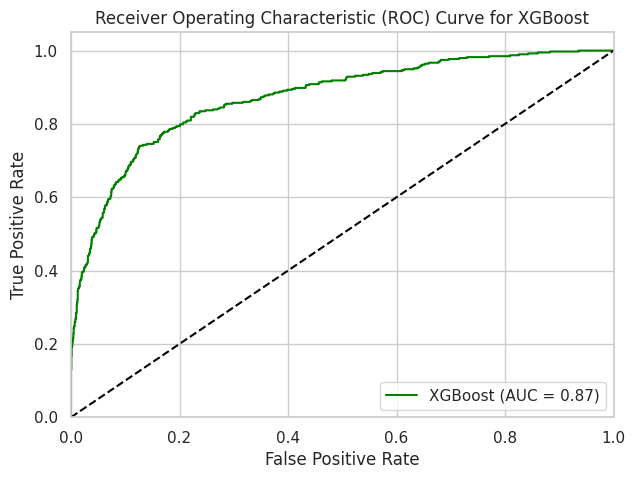

In [ ]:
# Calculate the predicted probabilities
y_pred_proba2 = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba2)

# Plot the ROC curve in red
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()


##**AdaBoost**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoostClassifier with a decision tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred3 = adaboost_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
class_report3 = classification_report(y_test, y_pred3)

a3= f"Accuracy: {accuracy:.4f}"
print(a3)
print("\nConfusion Matrix:\n", conf_matrix3)
print("\nClassification Report:\n", class_report3)

Accuracy: 0.8575

Confusion Matrix:
 [[1523   84]
 [ 201  192]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



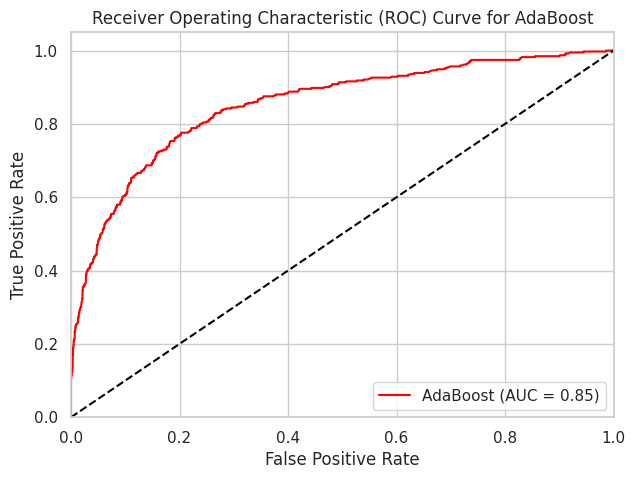

In [ ]:
# Calculate the predicted probabilities
y_pred_proba3 = adaboost_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba3)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba3)

# Plot the ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost')
plt.legend(loc="lower right")
plt.show()


##**Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier  # Added for diversity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
]

# Use a VotingClassifier as the final estimator for diversity
final_estimator = VotingClassifier(estimators=base_models)
# Create a StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=final_estimator)

# Train the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred4 = stacking_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred4)
conf_matrix4 = confusion_matrix(y_test, y_pred4)
class_report4 = classification_report(y_test, y_pred4)

a4= f"Accuracy: {accuracy:.4f}"
print(a4)
print("\nConfusion Matrix:\n", conf_matrix4)
print("\nClassification Report:\n", class_report4)


Accuracy: 0.8680

Confusion Matrix:
 [[1548   59]
 [ 205  188]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



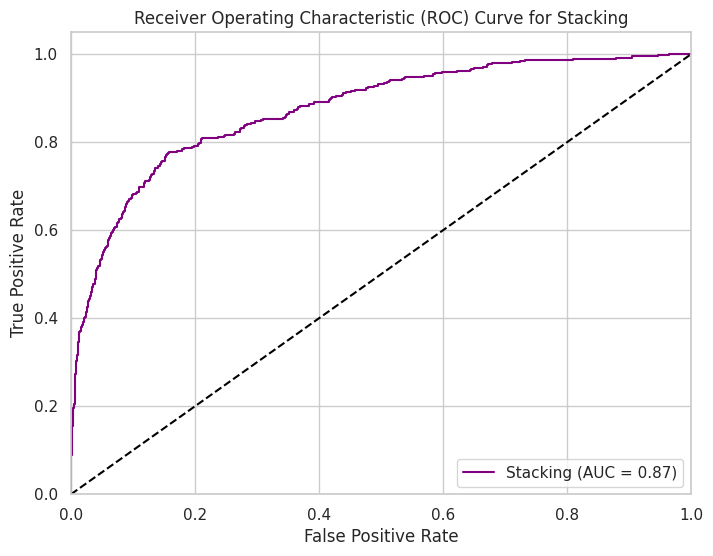

In [ ]:
# Get probability estimates from the base models and take the average
y_pred_proba4 = stacking_model.transform(X_test).mean(axis=1)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba4)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba4)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Stacking (AUC = {auc:.2f})', color="purple")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Stacking')
plt.legend(loc="lower right")
plt.show()


##**Summary**

In [ ]:
# Calculate predictions for each model
y_pred1 = rf.predict(X_test)
y_pred2 = xgb_model.predict(X_test)
y_pred3 = adaboost_model.predict(X_test)
y_pred4 = stacking_model.predict(X_test)

# Create a performance summary DataFrame
performance_summary = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'ADABoost', 'Stacking'],
    'Accuracy': [
        a1,
        a2,
        a3,
        a4
    ]
})

# Display the performance summary
print(performance_summary)


           Model          Accuracy
0  Random Forest  Accuracy: 0.8665
1        XGBoost  Accuracy: 0.8660
2       ADABoost  Accuracy: 0.8575
3       Stacking  Accuracy: 0.8680


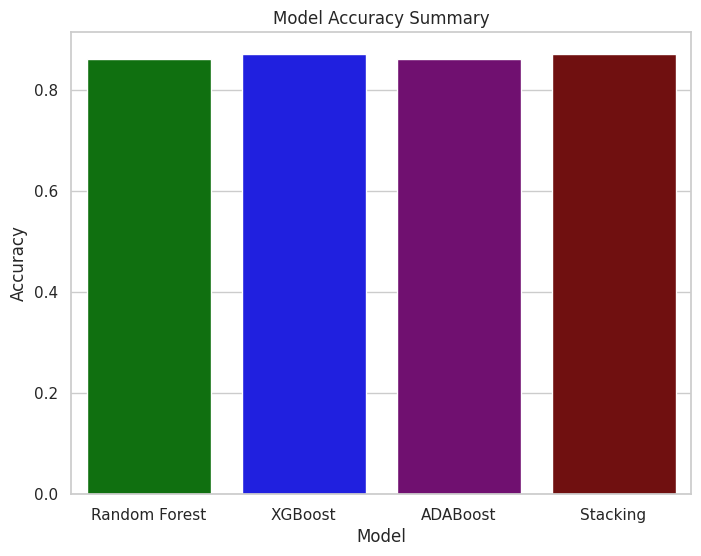

In [ ]:
data = {
    'Model': ['Random Forest', 'XGBoost', 'ADABoost', 'Stacking'],
    'Accuracy': ['Accuracy: 0.86', 'Accuracy: 0.87', 'Accuracy: 0.86', 'Accuracy: 0.87']
}

# Create a DataFrame
performance_summary = pd.DataFrame(data)

# Extract the accuracy values by removing the "Accuracy: " prefix
performance_summary['Accuracy'] = performance_summary['Accuracy'].str.replace('Accuracy: ', '').astype(float)

# Define custom colors
custom_palette = ["green", "blue", "purple", "maroon"]

# Set the style and color palette
sns.set(style="whitegrid", palette=custom_palette)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="Accuracy", data=performance_summary)
plt.title("Model Accuracy Summary")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


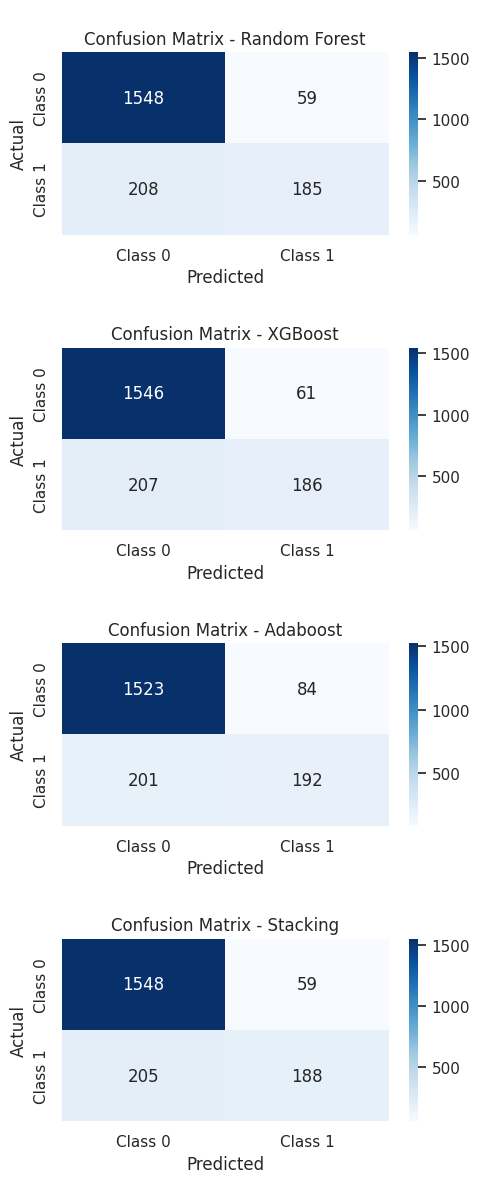

In [ ]:
# Define confusion matrices
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
conf_matrix4 = confusion_matrix(y_test, y_pred4)
confusion_matrices = [conf_matrix1, conf_matrix2, conf_matrix3, conf_matrix4]
model_names = ["Random Forest", "XGBoost", "Adaboost", "Stacking"]

# Set up subplots
fig, axes = plt.subplots(len(confusion_matrices), 1, figsize=(5, 3 * len(confusion_matrices)))

# Plot confusion matrices
for i in range(len(confusion_matrices)):
    sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"], ax=axes[i])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_title(f"\nConfusion Matrix - {model_names[i]}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
# Define classification reports and model names
classification_reports = [classification_report(y_test, y_pred1, output_dict=True),
                          classification_report(y_test, y_pred2, output_dict=True),
                          classification_report(y_test, y_pred3, output_dict=True),
                          classification_report(y_test, y_pred4, output_dict=True)]
model_names = ["Random Forest", "XGBoost", "Adaboost", "Stacking"]

# Initialize an empty list to store DataFrames
data_frames = []

# Extract metrics and create DataFrames
for report, model_name in zip(classification_reports, model_names):
    # Exclude 'macro avg' and 'micro avg' rows
    class_metrics = {k: v for k, v in report.items() if k.isnumeric()}

    df = pd.DataFrame(class_metrics).transpose()
    df['Model'] = model_name
    data_frames.append(df)

# Concatenate the DataFrames into one
result = pd.concat(data_frames)

# Reset the index
result.reset_index(inplace=True)

# Rename the 'index' column to 'Class'
result.rename(columns={'index': 'Class'}, inplace=True)

# Reorder the columns
result = result[['Model', 'Class', 'precision', 'recall', 'f1-score', 'support']]

# Display the DataFrame
print(result)
print("\nClass 0 = not exited/ not churned \nClass 1 = exited/churned")


           Model Class  precision    recall  f1-score  support
0  Random Forest     0   0.881549  0.963286  0.920607   1607.0
1  Random Forest     1   0.758197  0.470738  0.580848    393.0
2        XGBoost     0   0.881917  0.962041  0.920238   1607.0
3        XGBoost     1   0.753036  0.473282  0.581250    393.0
4       Adaboost     0   0.883411  0.947729  0.914440   1607.0
5       Adaboost     1   0.695652  0.488550  0.573991    393.0
6       Stacking     0   0.883058  0.963286  0.921429   1607.0
7       Stacking     1   0.761134  0.478372  0.587500    393.0

Class 0 = not exited/ not churned 
Class 1 = exited/churned


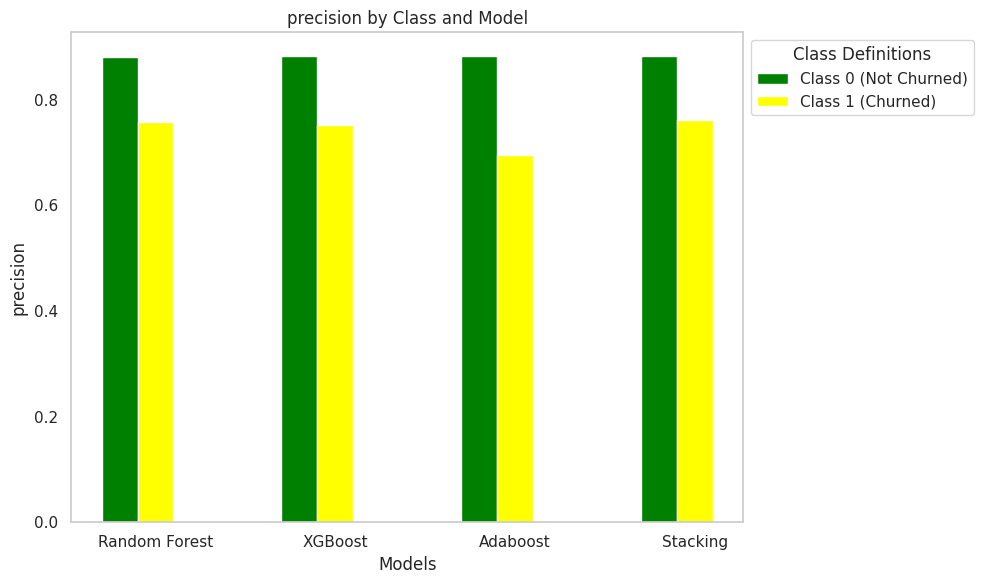

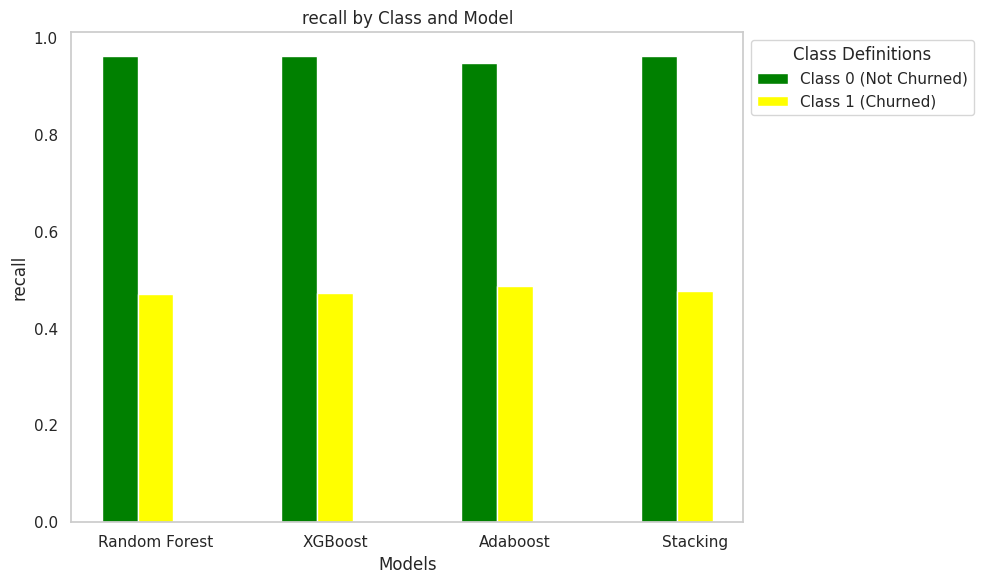

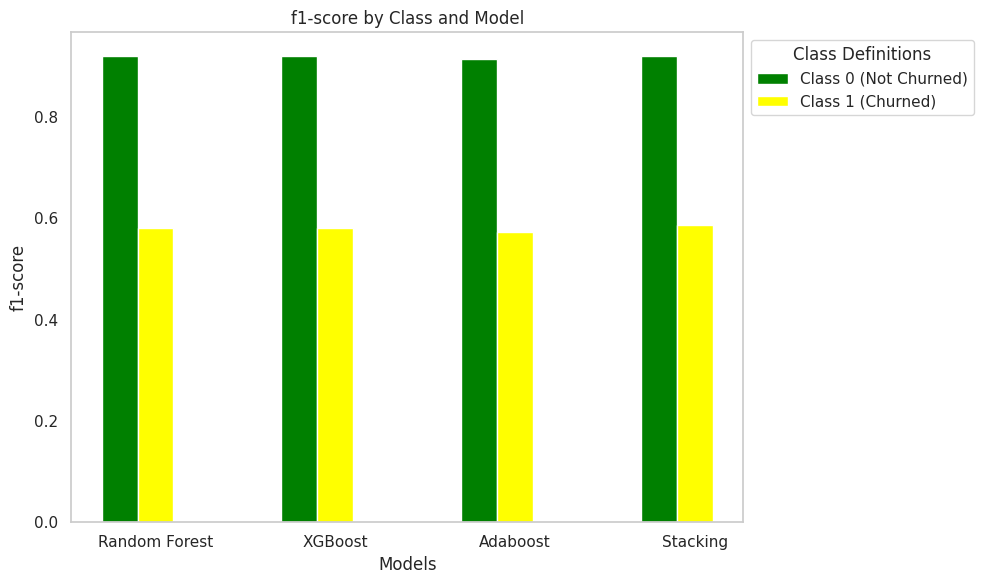

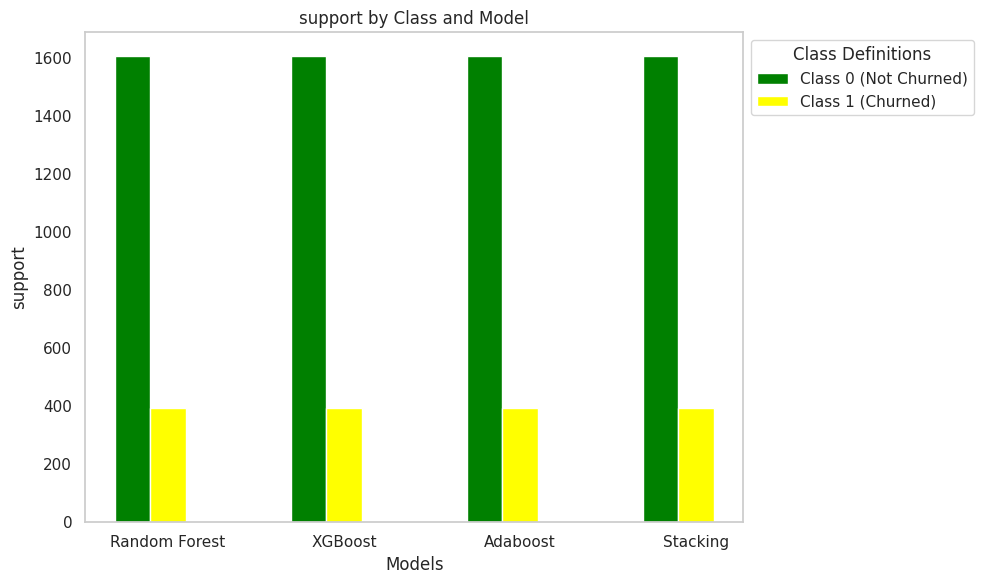

In [ ]:
# Define custom colors for the bars
class_colors = {'Class 0': 'green', 'Class 1': 'yellow'}

# Initialize empty lists to store DataFrames
data_frames_class_0 = []
data_frames_class_1 = []

# Extract metrics and create DataFrames for each class
for report, model_name in zip(classification_reports, model_names):
    class_metrics_0 = report.get('0', {})
    class_metrics_1 = report.get('1', {})

    # Create DataFrames for each class
    df_class_0 = pd.DataFrame(class_metrics_0, index=[model_name])
    df_class_1 = pd.DataFrame(class_metrics_1, index=[model_name])

    data_frames_class_0.append(df_class_0)
    data_frames_class_1.append(df_class_1)

# Concatenate the DataFrames for each class
result_class_0 = pd.concat(data_frames_class_0)
result_class_1 = pd.concat(data_frames_class_1)

# Define metrics
metrics = ['precision', 'recall', 'f1-score', 'support']

# Create a grouped bar chart with custom colors and without grid lines
width = 0.2
x = np.arange(len(model_names))

for i, metric in enumerate(metrics):
    fig, ax = plt.subplots(figsize=(10, 6))

    for j, class_df in enumerate([result_class_0, result_class_1]):
        ax.bar(x + j * width, class_df[metric], width, label=f'Class {j}', color=class_colors[f'Class {j}'])

    # Add a legend for class definitions outside the plot
    ax.legend(title='Class Definitions', labels=['Class 0 (Not Churned)', 'Class 1 (Churned)'], loc='upper left', bbox_to_anchor=(1, 1))

    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} by Class and Model')
    ax.set_xticks(x + width)
    ax.set_xticklabels(model_names)

    # Turn off grid lines
    ax.grid(False)

    plt.tight_layout()
    plt.show()


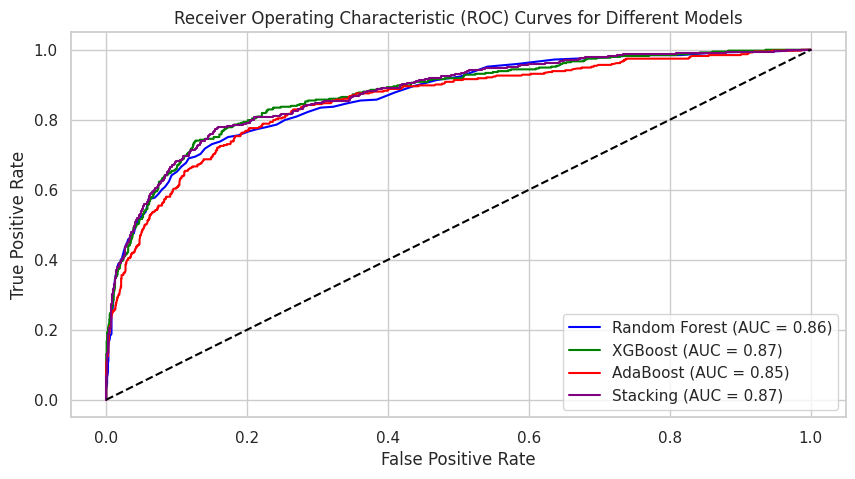

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# List of model names and their corresponding predicted probabilities
y_pred_proba1 = rf.predict_proba(X_test)[:, 1]
y_pred_proba2 = xgb_model.predict_proba(X_test)[:, 1]
y_pred_proba3 = adaboost_model.predict_proba(X_test)[:, 1]
y_pred_proba4 = stacking_model.transform(X_test).mean(axis=1)
model_names = ["Random Forest", "XGBoost", "AdaBoost", "Stacking"]
predicted_probabilities = [y_pred_proba1, y_pred_proba2, y_pred_proba3, y_pred_proba4]
colors = ['blue', 'green', 'red', 'purple']

# Create a figure and axis
plt.figure(figsize=(10, 5))

# Plot ROC curves for each model
for i, model_name in enumerate(model_names):
    fpr, tpr, _ = roc_curve(y_test, predicted_probabilities[i])
    auc = roc_auc_score(y_test, predicted_probabilities[i])

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', color=colors[i])

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Models')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()


##**Fitting best models - XGBoost, Stacking**

In [16]:
X_train = sc.fit_transform(X_train)
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=47, ...)

In [ ]:
stacking_model.fit(X,y)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('ada',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                   n_estimators=100,
                                                   random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=VotingClassifier(estimators=[('rf',
                                                                 RandomForestClassifier(random_state=42)),
                                                                ('ada',
                                                                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                                                    n_estimators=100,
                                                                                    random_state=42)),
                                                                ('gb',
                                                                 GradientBoostingClassifier(random_state=42))]))